# Cell pose image preparation for training 

In this notebook, we open an image, segment it with cellpose `cyto3' model, fix problems of segmentation with napari and store images in a folder for later retraining the model

In [16]:
pwd

'/home/kryten/Desktop/Aina'

## Load modules

In [17]:
import os
from cellpose import models, io
import numpy as np
from tifffile import imread, imsave, imwrite

from PIL import Image
import matplotlib.pyplot as plt

import napari
import imageio
import cv2


## Set up folders

In [33]:
input_folder  = '/home/kryten/Desktop/Martina/Img_Segmentacio_Aina/E1.7_bleo_cover_p16'
output_folder = '/home/kryten/Desktop/Imatges_AIna/database_seg_martina'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
actin_file = 'img_000000000_BrightField_000.tif'
nuc_file = 'img_000000000_DAPI_000.tif'

## Open an image example

(2304, 2304)


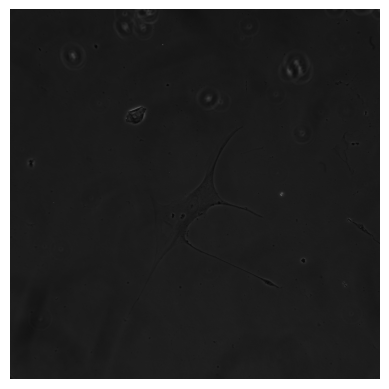

In [34]:
model = models.Cellpose(model_type='cyto3')

# Specify the image file to process
field_folder = 'Pos0'
field_path = os.path.join(input_folder, field_folder)

# Read the images
actin_path = os.path.join(field_path, actin_file)
image_a = Image.open(actin_path)
nuc_path = os.path.join(field_path, nuc_file)
image_n = Image.open(nuc_path)

#merge into 2 channels
combined_mode = 'I;16'
images = [image_a, image_n] #llista dels canals

stack_image = os.path.join(field_path, f'{field_folder}_image_stack.tif')
image_a.save(stack_image,
save_all=True,
append_images=[image_n])

image = io.imread(stack_image)
actin = io.imread(actin_path)
print(actin.shape)

plt.imshow(image[0], cmap='gray')
plt.axis('off')  # Turn off axis
plt.show()



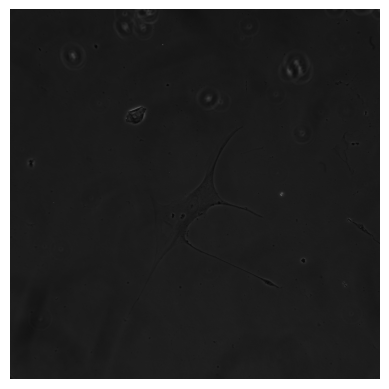

In [35]:

image= io.imread(stack_image)
plt.imshow(image[0], cmap='gray')
plt.axis('off')  # Turn off axis
plt.show()


# Make a first segmentation with cellpose

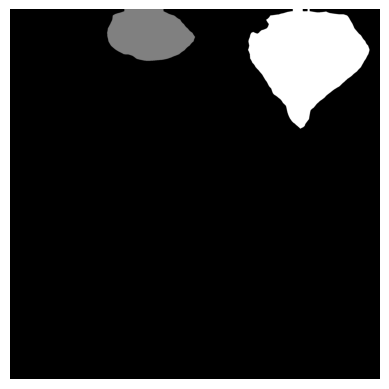

In [36]:
# Segment the image
#channels = [[2,1]]
#channels = [[0,0], [1,1]]
channels = [0,0]

# IF ALL YOUR IMAGES ARE THE SAME TYPE, you can give a list with 2 elements
# channels = [0,0] # IF YOU HAVE GRAYSCALE
# channels = [2,3] # IF YOU HAVE G=cytoplasm and B=nucleus
# channels = [2,1] # IF YOU HAVE G=cytoplasm and R=nucleus

# if diameter is set to None, the size of the cells is estimated on a per image basis
# you can set the average cell `diameter` in pixels yourself (recommended)
# diameter can be a list or a single number for all images
resample=True
cellprob_threshold = 0.5
model = models.Cellpose(gpu=True, model_type='cyto3')


masks, flows, styles, diams = model.eval(image, diameter=800, channels=channels)

plt.imshow(masks.astype(np.uint32), cmap='gray')
plt.axis('off')  # Turn off axis
plt.show()



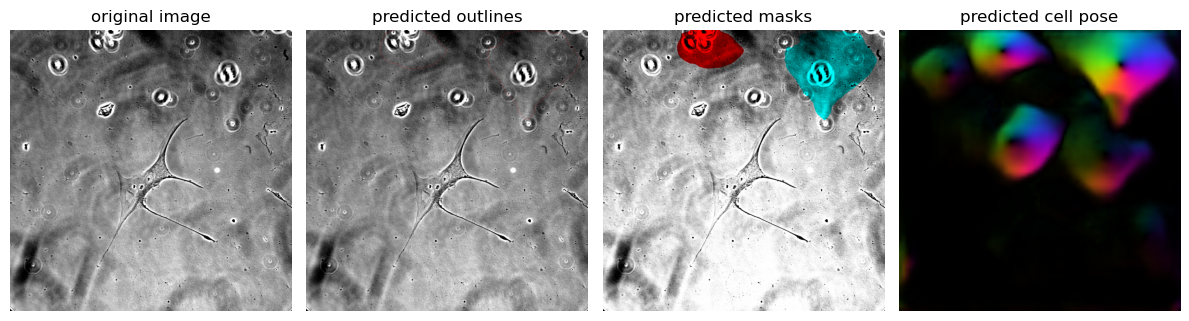

In [37]:
from cellpose import plot
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,5))
plot.show_segmentation(fig, image, masks, flows[0], channels=channels)
plt.tight_layout()
plt.show()

# Improve the segmentation with Napari

In [14]:
viewer = napari.Viewer()
viewer.add_image(image[1], name='Nucleus')
viewer.add_image(image[0], name='Original Image')
viewer.add_labels(masks, name='Mask')


<Labels layer 'Mask' at 0x70987e1c0130>

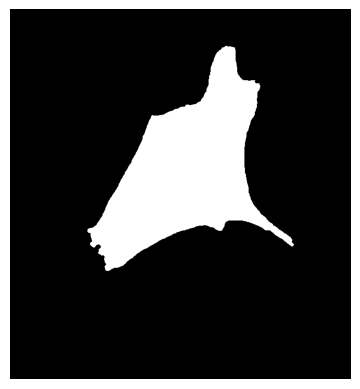

In [175]:
plt.imshow(masks.astype(np.uint8), cmap='gray')
plt.axis('off')  # Turn off axis
plt.show()

In [176]:
# Save the mask
mask_name = f"2_{field_folder}__mask.tif"
mask_path = os.path.join(output_folder, mask_name)
imsave(mask_path, masks.astype(np.uint16))

stack_image = os.path.join(output_folder, f'2_{field_folder}_image_stack.tif')
image_a.save(stack_image,
save_all=True,
append_images=[image_n])
print(f"Saved mask: {mask_path}")

Saved mask: /home/kryten/Desktop/Imatges_AIna/database_seg_sergi/2_cell60__mask.tif


/tmp/ipykernel_5867/1862772893.py:4: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  imsave(mask_path, masks.astype(np.uint16))
